In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from numpy import array
from sklearn.preprocessing import LabelEncoder
import scipy.stats as s
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns


os.chdir("C:/Users/FARIYA/Desktop")
dataset1 = pd.read_csv('CarPrice_Assignment.csv')
display(dataset1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [2]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
dataset1.shape

(205, 26)

In [4]:
dataset1.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
dataset1.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
missing=["4wd","l"]
dataset1=pd.read_csv('CarPrice_Assignment.csv',na_values=missing)

In [7]:
dataset1.head(50)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,NaN,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,NaN,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [8]:
dataset1['drivewheel'].mode()
dataset1['drivewheel'].fillna(dataset1['drivewheel'].mode()[0],inplace=True)

In [9]:
dataset1['enginetype'].mode()
dataset1['enginetype'].fillna(dataset1['enginetype'].mode()[0],inplace=True)

In [10]:
dataset1.head(50)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,fwd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,fwd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [13]:
dataset1['doornumber']=dataset1['doornumber'].astype('category')

In [12]:
dataset1['aspiration']=dataset1['aspiration'].astype('category')

In [81]:
dataset1['CarName']=dataset1['CarName'].astype('category')

In [15]:
dataset1['CarName']=dataset1['CarName'].astype('category')

In [16]:
dataset1['enginetype']=dataset1['enginetype'].astype('category')

In [18]:
dataset1['cylindernumber']=dataset1['cylindernumber'].astype('category')

In [19]:
dataset1['fueltype']=dataset1['fueltype'].astype('category')

In [20]:
dataset1['drivewheel']=dataset1['drivewheel'].astype('category')

In [ ]:
dataset1['symboling']=dataset1['symboling'].astype('category')

In [21]:
dataset1['fuelsystem']=dataset1['fuelsystem'].astype('category')

In [22]:
dataset1['enginelocation']=dataset1['enginelocation'].astype('category')

In [67]:
def anova_func(data,f1,target,alpha):
    feature_frame=data[[f1,target]]
#     print(feature_frame)
    groups=feature_frame.groupby(f1).groups
   
    newDict={}
    feature_class=feature_frame[target]
    
    dfd=0
    attributes=[]
    for key in groups.keys():
        category_name=key.replace(' ','_')
        attributes.append(category_name)
        newDict[category_name]=(feature_class[groups[key]])
        dfd=dfd+len(newDict[category_name])-1
       
    f,p=s.f_oneway(*newDict.values())   
    c_value=s.f.ppf(q=1-alpha,dfn=len(attributes)-1,dfd=dfd)
    
    if(f>c_value):
        print("Reject H0: The feature is correlated with the target variable")
    else:
        print("Retain H0: The feature is not correlated with the target variable")

In [34]:
dataset1['symboling']=dataset1['symboling'].replace([-2,-1,0,1,2,3],['damaged lights','tyre puncture','temperature warning','oil pressure low','brake warning','air bag warning'])

In [68]:
anova_func(dataset1,'doornumber','price',0.05)

Retain H0: The feature is not correlated with the target variable


In [69]:
anova_func(dataset1,'aspiration','price',0.05)

Reject H0: The feature is correlated with the target variable


In [70]:
anova_func(dataset1,'carbody','price',0.05)

Reject H0: The feature is correlated with the target variable


In [71]:
anova_func(dataset1,'enginetype','price',0.05)

Reject H0: The feature is correlated with the target variable


In [72]:
anova_func(dataset1,'cylindernumber','price',0.05)

Reject H0: The feature is correlated with the target variable


In [73]:
anova_func(dataset1,'fueltype','price',0.05)

Retain H0: The feature is not correlated with the target variable


In [76]:
anova_func(dataset1,'drivewheel','price',0.05)

Reject H0: The feature is correlated with the target variable


In [78]:
anova_func(dataset1,'fuelsystem','price',0.05)

Reject H0: The feature is correlated with the target variable


In [79]:
anova_func(dataset1,'enginelocation','price',0.05)

Reject H0: The feature is correlated with the target variable


In [82]:
anova_func(dataset1,'CarName','price',0.05)

Reject H0: The feature is correlated with the target variable


In [50]:
corr_mat=dataset1.corr()
corr_mat

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
wheelbase,0.129729,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.150276,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [51]:
print(corr_mat['price'].sort_values(ascending=False))

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


<span style="color:purple"> By analysing we can see that all the negative values and (stroke),(compressionratio) has no impact on target variable</span>

In [112]:
label_encoder = LabelEncoder()
dataset1['cylindernumber']=dataset1['cylindernumber'].replace(['two','three','four','five','six','eight','twelve'],[2,3,4,5,6,8,12])

dataset1['drivewheel'] = label_encoder.fit_transform(dataset1.drivewheel)
dataset1['enginetype'] = label_encoder.fit_transform(dataset1.enginetype)
dataset1['aspiration'] = label_encoder.fit_transform(dataset1.aspiration)
dataset1['enginelocation'] = label_encoder.fit_transform(dataset1.enginelocation)
dataset1['CarName'] = label_encoder.fit_transform(dataset1.CarName)
dataset1['fuelsystem'] = label_encoder.fit_transform(dataset1.fuelsystem)
dataset1['carbody'] = label_encoder.fit_transform(dataset1.carbody)

In [113]:
dataset1.head(20)

,symboling,CarName,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower
0,3,2,0,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,111
1,3,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,111
2,1,1,0,2,2,0,94.5,171.2,65.5,52.4,2823,5,6,152,5,2.68,154
3,2,4,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,4,109,5,3.19,102
4,2,5,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,5,136,5,3.19,115
5,2,9,0,3,1,0,99.8,177.3,66.3,53.1,2507,3,5,136,5,3.19,110
6,1,5,0,3,1,0,105.8,192.7,71.4,55.7,2844,3,5,136,5,3.19,110
7,1,7,0,4,1,0,105.8,192.7,71.4,55.7,2954,3,5,136,5,3.19,110
8,1,6,1,3,1,0,105.8,192.7,71.4,55.9,3086,3,5,131,5,3.13,140
9,0,8,1,2,0,0,99.5,178.2,67.9,52.0,3053,3,5,131,5,3.13,160


In [85]:
dataset1.drop(['highwaympg'],axis=1,inplace=True)

In [86]:
dataset1.drop(['citympg'],axis=1,inplace=True)

In [87]:
dataset1.drop(['car_ID'],axis=1,inplace=True)

In [88]:
dataset1.drop(['peakrpm'],axis=1,inplace=True)

In [89]:
dataset1.drop(['compressionratio'],axis=1,inplace=True)

In [90]:
dataset1.drop(['stroke'],axis=1,inplace=True)

In [96]:
dataset1.drop(['doornumber'],axis=1,inplace=True)

In [104]:
dataset1.drop(['fueltype'],axis=1,inplace=True)

In [105]:
dataset1.shape

(205, 17)

In [92]:
y=dataset1['price']

In [93]:
dataset1.drop(['price'],axis=1,inplace=True)

In [114]:
x=dataset1

In [115]:
x

,symboling,CarName,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower
0,3,2,0,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,111
1,3,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,111
2,1,1,0,2,2,0,94.5,171.2,65.5,52.4,2823,5,6,152,5,2.68,154
3,2,4,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,4,109,5,3.19,102
4,2,5,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,5,136,5,3.19,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,4,141,5,3.78,114
201,-1,138,1,3,2,0,109.1,188.8,68.8,55.5,3049,3,4,141,5,3.78,160
202,-1,140,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,6,173,5,3.58,134
203,-1,142,1,3,2,0,109.1,188.8,68.9,55.5,3217,3,6,145,3,3.01,106


In [116]:
xtrain , xtest , ytrain, ytest =train_test_split(x,y,test_size=0.2,random_state=2)

In [117]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (164, 17)
xtest shape  :  (41, 17)
ytrain shape :  (164,)
ytest shape  :  (41,)


In [118]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(xtrain, ytrain) 

y_pred = regressor.predict(xtest) 

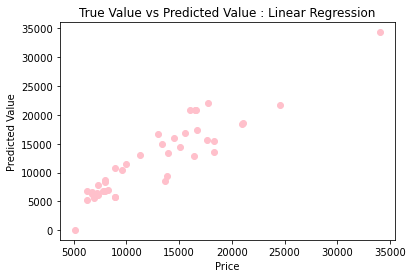

In [119]:
plt.scatter(ytest, y_pred, c = 'pink') 
plt.xlabel("Price") 
plt.ylabel("Predicted Value") 
plt.title("True Value vs Predicted Value : Linear Regression") 
plt.show() 

In [122]:
print('Mean Squared Error=', metrics.mean_squared_error(ytest, y_pred)) 

Mean Squared Error= 6858016.348085116


## LOAN DATASET

In [179]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from numpy import array
from sklearn.preprocessing import LabelEncoder
import scipy.stats as s
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns


os.chdir("C:/Users/FARIYA/Desktop")
dataset2 = pd.read_csv('loan_data_set.csv')
display(dataset2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [180]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [181]:
dataset2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [182]:
dataset2.shape

(614, 13)

In [183]:
dataset2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [184]:
missing=["na","--"]

In [185]:
dataset2=pd.read_csv("loan_data_set.csv" ,na_values=missing)

In [187]:
dataset2['Gender'].mode()
dataset2['Gender'].fillna(dataset2['Gender'].mode()[0],inplace=True)

In [188]:
dataset2['Married'].mode()
dataset2['Married'].fillna(dataset2['Married'].mode()[0],inplace=True)

In [189]:
dataset2.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [190]:
dataset2.dropna(axis=1,thresh=0.70*len(dataset2),inplace=True)

In [193]:
mode=dataset2['Dependents'].mode().values[0]

In [194]:
dataset2['Dependents'].fillna(mode, inplace=True)

In [195]:
dataset2['Self_Employed'].mode()
dataset2['Self_Employed'].fillna(dataset2['Self_Employed'].mode()[0],inplace=True)

In [197]:
median=dataset2['LoanAmount'].median()

In [198]:
dataset2['LoanAmount'].fillna(median, inplace=True)

In [199]:
dataset2['Credit_History'].mode()
dataset2['Credit_History'].fillna(dataset2['Credit_History'].mode()[0],inplace=True)

In [200]:
median=dataset2['Loan_Amount_Term'].median()

In [201]:
dataset2['Loan_Amount_Term'].fillna(median, inplace=True)

In [202]:
dataset2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [203]:
def test_dependency(data,f1,f2,alpha):
    ov=pd.crosstab(data[f1],data[f2])
    b=s.chi2_contingency(ov)
    chi2_statistic=b[0]
    p_value=b[1]
    dof=b[2]
    critical_value=s.chi2.ppf(q=1-alpha, df=dof)
    ## ppf stands for percent point function . It takes two parameters confidence interval and degrees of freedom. 
    ##It returns the critical value. ppf is the inverse of cumulative distribution function.
    ## https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',dof)
    print('chi-square statistic:',chi2_statistic)
    print('critical_value:',critical_value)
    print('p-value:',p_value)
    
    if chi2_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    

In [204]:
test_dependency(dataset2,'Married','Loan_Status',0.05)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 4.73187557933362
critical_value: 3.841458820694124
p-value: 0.029608580862582116
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [205]:
test_dependency(dataset2,'Education','Loan_Status',0.05)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 4.091490413303621
critical_value: 3.841458820694124
p-value: 0.04309962129357355
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [206]:
test_dependency(dataset2,'Gender','Loan_Status',0.05)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.11087854691241235
critical_value: 3.841458820694124
p-value: 0.7391461310869638
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [207]:
test_dependency(dataset2,'Self_Employed','Loan_Status',0.05)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.0013148242700656973
critical_value: 3.841458820694124
p-value: 0.9710746411403309
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [208]:
test_dependency(dataset2,'Property_Area','Loan_Status',0.05)

Significance level:  0.05
Degree of Freedom:  2
chi-square statistic: 12.297623130485675
critical_value: 5.991464547107979
p-value: 0.0021360187811644937
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [213]:
dataset2.drop(columns=['Self_Employed'],inplace=True)

In [214]:
dataset2.drop(columns=['Gender'],inplace=True)

In [215]:
dataset2['Loan_Status'].replace(to_replace='Y', value=1, inplace=True)
dataset2['Loan_Status'].replace(to_replace='N',  value=0, inplace=True)
df_dummies = pd.get_dummies(dataset2)

# We will use the data frame where we had created dummy variables
y = df_dummies['Loan_Status'].values
X = df_dummies.drop(columns = ['Loan_Status'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [218]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
result=model.fit(X_train, y_train);

In [219]:
from sklearn import metrics
prediction_test = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test)
print(accuracy)

0.7621621621621621


In [220]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train); 

In [221]:
from sklearn import metrics
prediction_test = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test)
print(accuracy)

0.7837837837837838
